In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression as LR,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR, AdaBoostRegressor as ABR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.externals import joblib


import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_train = pd.read_excel('datasets/Project_19_Restaurant_Food_Cost_Train.xlsx')
data_test = pd.read_excel('datasets/Project_19_Restaurant_Food_Cost_Test.xlsx')

In [3]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
data_train.shape,
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [6]:
#Checking for null vallues
print("Train Data")
print(data_train.isnull().sum())
print()
print("Test Data")
print(data_test.isnull().sum())

Train Data
TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Test Data
TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [7]:
#Combining training and testing dataset by adding a reference column
#0 for training dataset
#1 for testing dataset
data_train["Data"]= 0
data_test["Data"]= 1

In [8]:
#Concating datasets
data=pd.concat([data_train,data_test])

In [9]:
data

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",0,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",0,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",0,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",0,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,0,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",1,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",1,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes
4228,Faridabad,NaN,"Continental, North Indian",1,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes
4229,Kochi,NaN,"Rolls, Beverages",1,Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN


In [10]:
data.reset_index(drop=True,inplace=True)

In [11]:
#Checking for the unique values


for col in data.columns:
    print("Unique values in: " , col , data[col].nunique())

Unique values in:  CITY 450
Unique values in:  COST 86
Unique values in:  CUISINES 5183
Unique values in:  Data 2
Unique values in:  LOCALITY 1636
Unique values in:  RATING 32
Unique values in:  RESTAURANT_ID 15574
Unique values in:  TIME 3295
Unique values in:  TITLE 123
Unique values in:  VOTES 2075


In [12]:
for col in data.columns:
    if data[col].dtype=="object":
        print("Checking for", col)
        print()
        print(data[col].value_counts())
        print()

Checking for CITY

Chennai                                 2855
Bangalore                               2835
Hyderabad                               2458
Mumbai                                  2311
New Delhi                               1754
                                        ... 
Thiruvanmiyur (Opp Eurokids LB Road)       1
Secunderabad. WE HAVE NO BRANCHES.         1
Sector 7 Dwarka                            1
Mig Housing Society                        1
Hyderabad Behind Vacs Pastries             1
Name: CITY, Length: 450, dtype: int64

Checking for CUISINES

North Indian                                               716
North Indian, Chinese                                      714
South Indian                                               706
Fast Food                                                  364
Chinese                                                    226
                                                          ... 
Thai, Asian, Indonesian, Vietnamese           

In [13]:
data.isnull().sum()

CITY              147
COST             4231
CUISINES            0
Data                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [14]:
#Checking null values in City
data.loc[data["CITY"].isnull()]

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
129,NaN,500.0,"North Indian, South Indian, Chinese, Continental",0,NaN,3.6,9101,"12noon – 3pm, 7pm – 2am (Mon-Sun)",None,728 votes
246,NaN,300.0,Biryani,0,Palarivattom Kochi,3.4,14502,12noon – 11pm (Mon-Sun),QUICK BITES,82 votes
411,NaN,600.0,"North Indian, Chinese, Pizza, Burger, Fast Food",0,NaN,4.0,6313,7pm – 4am (Mon-Sun),None,29 votes
466,NaN,200.0,North Indian,0,NaN,4.2,1133,4pm – 9pm (Mon-Sun),None,55 votes
481,NaN,250.0,Street Food,0,NaN,3.7,4788,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",None,616 votes
...,...,...,...,...,...,...,...,...,...,...
16311,NaN,NaN,"Continental, Mexican, American",1,Maharashtra 400013,4.0,9779,5pm – 1:30am (Mon-Sun),"PUB,CASUAL DINING",1142 votes
16313,NaN,NaN,"North Indian, South Indian, Chinese, Biryani",1,NaN,3.5,5922,6am – 11:30pm (Mon-Sun),CASUAL DINING,102 votes
16803,NaN,NaN,"Fast Food, Italian, Pizza, Sandwich",1,NaN,3.7,4748,1pm – 8am (Mon-Sun),None,27 votes
16815,NaN,NaN,"Chinese, North Indian",1,NaN,3.5,8587,"11:45am – 3:30pm, 7:30pm – 11:40pm (Mon, Sat)...",QUICK BITES,25 votes


In [15]:
#we will replace missed values wtih 'Not Available' in city

data['CITY'].fillna("Not Available",inplace=True)

In [16]:
#we will replace missed values wtih 'Not Available' in locality

data['LOCALITY'].fillna("Not Available",inplace=True)

In [17]:
data.isnull().sum()

CITY                0
COST             4231
CUISINES            0
Data                0
LOCALITY            0
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [18]:
#Checking for Rating

data.loc[data["RATING"].isnull()]

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
204,Kochi,200.0,Bakery,0,Marine Drive,NaN,15062,Not Available,BAKERY,NaN
421,Hyderabad,350.0,"Cafe, Fast Food",0,Banjara Hills,NaN,14127,Not Available,CAFÉ,NaN
14725,Kochi,NaN,"Kerala, Arabian",1,Kakkanad,NaN,2776,Not Available,QUICK BITES,NaN
15448,Kochi,NaN,"Chinese, North Indian, South Indian",1,Tripunithura,NaN,11301,Not Available,None,NaN


In [19]:
#We can replace rating with 0.

data['RATING'].fillna(0,inplace=True)

In [20]:
data.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', 0, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [21]:
#We can see there are some value '-' and "NEW" are present in RATING
#We will replace it with 0

data['RATING'].replace("NEW",0,inplace=True)
data['RATING'].replace("-",0,inplace=True)

In [22]:
data.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', 0,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [23]:
#Checking for Votes now
data.loc[data["VOTES"].isnull()]

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
13,Kochi,400.0,South Indian,0,Edappally,0,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,NaN
62,Kochi,200.0,"North Indian, Beverages",0,Kalamassery,0,7841,11am – 11pm (Mon-Sun),QUICK BITES,NaN
69,New Delhi,200.0,"Pizza, Fast Food",0,Kalkaji,0,11096,11am – 11pm (Mon-Sun),None,NaN
85,Bangalore,300.0,"North Indian, South Indian",0,Vijay Nagar,0,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,NaN
111,Mumbai,800.0,"Gujarati, Rajasthani, North Indian",0,Borivali West,0,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,NaN
...,...,...,...,...,...,...,...,...,...,...
16873,Noida,NaN,"Cafe, North Indian",1,Sector 63,0,7007,11am – 11pm (Mon-Sun),CAFÉ,NaN
16875,New Delhi,NaN,Fast Food,1,Shalimar Bagh,0,6387,12:30pm – 10:30pm (Mon-Sun),QUICK BITES,NaN
16888,Bangalore,NaN,Continental,1,Indiranagar,0,13381,11am – 12midnight (Mon-Sun),QUICK BITES,NaN
16913,Mumbai,NaN,"Sindhi, Street Food",1,Lower Parel,0,6887,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",CASUAL DINING,NaN


As we can see, Votes is having missing values.

In [24]:
#We will replace missing values with 0
data["VOTES"].fillna(0,inplace=True)

In [25]:
#Lets check again for Null values

data.isnull().sum()

CITY                0
COST             4231
CUISINES            0
Data                0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
dtype: int64

In [26]:
#SO far we have cleaned all missing values from dataset

Now we will seperate Title into multiple column, seperated by (,)

In [27]:
#Finding max number of titles
max_title = 1
for i in data.TITLE :
    if len(i.split(',')) > max_title:
         max_title = len(i.split(','))
            
print("Max number of title present in TITLE ", max_title)

Max number of title present in TITLE  2


In [28]:
# As max no of title is 2, we will create two columns, and adding title to each column, if not present we will add NONE
TITLE_1 = []
TITLE_2 = []

for i in data.TITLE:
    TITLE_1.append(i.split(',')[0].strip().upper())
    try :
         TITLE_2.append(i.split(',')[1].strip().upper())
    except :
         TITLE_2.append('NONE')


In [29]:
#Adding into dataset

data['TITLE_1'] = TITLE_1
data['TITLE_2'] = TITLE_2

In [30]:
data.head()

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,TITLE_1,TITLE_2
0,Thane,1200.0,"Malwani, Goan, North Indian",0,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,CASUAL DINING,NONE
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",0,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,CASUAL DINING,BAR
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",0,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,CASUAL DINING,NONE
3,Mumbai,800.0,"Tibetan, Chinese",0,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,QUICK BITES,NONE
4,Mumbai,300.0,Desserts,0,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,DESSERT PARLOR,NONE


Now we will seperate Cuisines into multiple column, seperated by (,)

In [31]:
#Finding max number of titles
max_CUISINES = 1
for i in data.CUISINES :
    if len(i.split(',')) > max_CUISINES:
         max_CUISINES = len(i.split(','))
            
print("Max number of title present in TITLE ", max_CUISINES)

Max number of title present in TITLE  8


In [32]:
CUISINES_1 = []
CUISINES_2 = []
CUISINES_3 = []
CUISINES_4 = []
CUISINES_5 = []
CUISINES_6 = []
CUISINES_7 = []
CUISINES_8 = []


for i in data.CUISINES:
        try :
            CUISINES_1.append(i.split(',')[0].strip().upper())
        except :
            CUISINES_1.append('NONE')
        try :
            CUISINES_2.append(i.split(',')[1].strip().upper())
        except :
            CUISINES_2.append('NONE')
        try :
            CUISINES_3.append(i.split(',')[2].strip().upper())
        except :
            CUISINES_3.append('NONE')
        try :
            CUISINES_4.append(i.split(',')[3].strip().upper())
        except :
            CUISINES_4.append('NONE')
        try :
            CUISINES_5.append(i.split(',')[4].strip().upper())
        except :
            CUISINES_5.append('NONE')
        try :
            CUISINES_6.append(i.split(',')[5].strip().upper())
        except :
            CUISINES_6.append('NONE')
        try :
            CUISINES_7.append(i.split(',')[6].strip().upper())
        except :
            CUISINES_7.append('NONE')
        try :
            CUISINES_8.append(i.split(',')[7].strip().upper())
        except :
            CUISINES_8.append('NONE')


In [33]:
data['CUISINES_1'] = CUISINES_1
data['CUISINES_2'] = CUISINES_2
data['CUISINES_3'] = CUISINES_3
data['CUISINES_4'] = CUISINES_4
data['CUISINES_5'] = CUISINES_5
data['CUISINES_6'] = CUISINES_6
data['CUISINES_7'] = CUISINES_7
data['CUISINES_8'] = CUISINES_8

In [34]:
data.head()

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8
0,Thane,1200.0,"Malwani, Goan, North Indian",0,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,CASUAL DINING,NONE,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",0,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,CASUAL DINING,BAR,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",0,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE
3,Mumbai,800.0,"Tibetan, Chinese",0,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,QUICK BITES,NONE,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE
4,Mumbai,300.0,Desserts,0,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,DESSERT PARLOR,NONE,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [35]:
#Dropping columns

data.drop(columns=["CUISINES","RESTAURANT_ID","TITLE","TIME"],inplace=True)

In [36]:
data.head()

,CITY,COST,Data,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8
0,Thane,1200.0,0,Dombivali East,3.6,49 votes,CASUAL DINING,NONE,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE
1,Chennai,1500.0,0,Ramapuram,4.2,30 votes,CASUAL DINING,BAR,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE
2,Chennai,800.0,0,Saligramam,3.8,221 votes,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE
3,Mumbai,800.0,0,Bandra West,4.1,24 votes,QUICK BITES,NONE,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE
4,Mumbai,300.0,0,Lower Parel,3.8,165 votes,DESSERT PARLOR,NONE,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [37]:
#As we can see, VOTES is having string 'votes', we will split 'votes' and converrt into integer

data['VOTES'] = data['VOTES'].str.replace(' votes', '').astype(float)
data["VOTES"].fillna(0,inplace=True)

In [38]:
#COnverting Rating into float
data['RATING'] = data['RATING'].astype(float)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 16 columns):
CITY          16921 non-null object
COST          12690 non-null float64
Data          16921 non-null int64
LOCALITY      16921 non-null object
RATING        16921 non-null float64
VOTES         16921 non-null float64
TITLE_1       16921 non-null object
TITLE_2       16921 non-null object
CUISINES_1    16921 non-null object
CUISINES_2    16921 non-null object
CUISINES_3    16921 non-null object
CUISINES_4    16921 non-null object
CUISINES_5    16921 non-null object
CUISINES_6    16921 non-null object
CUISINES_7    16921 non-null object
CUISINES_8    16921 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 2.1+ MB


Encoding Categorical Variables

In [40]:
#Encoding categorical data

le = LE()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [41]:
data.head()

,CITY,COST,Data,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8
0,401,1200.0,0,328,3.6,49.0,5,16,61,32,72,64,62,50,41,18
1,75,1500.0,0,1215,4.2,30.0,5,1,6,62,45,64,62,50,41,18
2,75,800.0,0,1273,3.8,221.0,5,16,74,23,14,34,62,50,41,18
3,277,800.0,0,161,4.1,24.0,23,16,102,23,70,64,62,50,41,18
4,277,300.0,0,709,3.8,165.0,9,16,30,67,70,64,62,50,41,18


In [42]:
#Dividing data

#From the above labeling we will divide our data again into train and test
#0 for training dataset
#1 for testing dataset

train_data = data.loc[data["Data"]==0]
test_data  = data.loc[data["Data"]==1]

In [43]:
train_data.shape,data_train.shape

((12690, 16), (12690, 10))

In [44]:
#Dropping the index
test_data.reset_index(drop=True,inplace=True)

In [45]:
test_data.columns

Index(['CITY', 'COST', 'Data', 'LOCALITY', 'RATING', 'VOTES', 'TITLE_1',
       'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3', 'CUISINES_4',
       'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8'],
      dtype='object')

In [46]:
train_data.columns

Index(['CITY', 'COST', 'Data', 'LOCALITY', 'RATING', 'VOTES', 'TITLE_1',
       'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3', 'CUISINES_4',
       'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8'],
      dtype='object')

In [47]:
#Dropping the column
train_data.drop(columns=["Data"],inplace=True)
test_data.drop(columns=["Data"],inplace=True)

### SPLITTING DATA

In [48]:
x = train_data.drop(columns = ["COST"])
y = train_data.COST

In [49]:
x.shape,y.shape 


((12690, 14), (12690,))

#### SCALLING THE DATA

In [50]:
#Scaling data
ss=SS()
ss.fit(x)
x=ss.transform(x)

#### USING PCA 

In [51]:
#Here we will use PCA to get most correlated features from dataset as many were having null values
#pca = PCA(n_components=10)
#x = pca.fit_transform(x)
#x_pca = pd.DataFrame(data = x)

In [52]:
x_pca = x

### TRAIN TEST SPLIT WITH PCA VALUES

In [53]:
def main_fun_pca(models):
    r2_scores = []
    for model,name in models.items():
        print("Checking R2 score for",name)
        i = 0
        max_r2_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            r2_scr = r2_score(test_y,pred_y)
            r2_scr = round(r2_scr*100)
            if r2_scr > max_r2_score:
                max_r2_score = r2_scr
                final_r_state = r_state
        print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)
        print()
        print("-----------------------------------------------------------------------------------------------")
        r2_scores.append(max_r2_score)
    return r2_scores

In [54]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNR()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x_pca,y)
gknn.best_params_

{'n_neighbors': 9}

In [55]:
#Finding best parameters for RFR

rfr = RFR() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_pca, y)
CV_rfc.best_params_

{'n_estimators': 100}

In [56]:
#Instantiate the classifiers
clf_lr = LR()
clf_dtree = DTR()
clf_knn =  KNR(n_neighbors=9)
clf_rfr = RFR(n_estimators=200)
clf_adr = ABR()
clf_gbr = GBR()

In [57]:
regressor = ['LinearRegression', 'DecisionTree', 'KNR', 'RandomForest', 'Adaboost','GradientBoost']

In [58]:
models = {clf_lr:'LinearRegression',
          clf_dtree:'DecisionTree',
          clf_knn: 'KNN',
          clf_rfr: 'RandomForest',
          clf_adr: 'Adaboost',
          clf_gbr: 'GradientBoost'
         }

In [59]:
r2_scores = main_fun_pca(models)

Checking R2 score for LinearRegression
Max R2 Score Corresponding to random state  67  is  25.0

-----------------------------------------------------------------------------------------------
Checking R2 score for DecisionTree
Max R2 Score Corresponding to random state  93  is  57.0

-----------------------------------------------------------------------------------------------
Checking R2 score for KNN
Max R2 Score Corresponding to random state  79  is  42.0

-----------------------------------------------------------------------------------------------
Checking R2 score for RandomForest
Max R2 Score Corresponding to random state  43  is  75.0

-----------------------------------------------------------------------------------------------
Checking R2 score for Adaboost
Max R2 Score Corresponding to random state  63  is  29.0

-----------------------------------------------------------------------------------------------
Checking R2 score for GradientBoost
Max R2 Score Corresponding t

In [60]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score

def cross_val_main_fun(models):
    r2_score_array = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        
        score = cross_val_score(model,x,y,cv=5,scoring="r2")

        print('Cross Val Score: ', score)
        print('Mean Scores: ',score.mean())
        print('Standard deviation: ',score.std())

        print('Score :', round(score.mean()*100))

        r2_score = round(score.mean()*100)
        
        print()
        print("-----------------------------------------------------------------------------------------------")
        r2_score_array.append(r2_score)
    return r2_score_array


In [61]:
r2_score_cross_val = cross_val_main_fun(models)

Checking ROC score for LinearRegression
Cross Val Score:  [0.16879606 0.18560633 0.17026577 0.19904873 0.23957667]
Mean Scores:  0.19265871114616512
Standard deviation:  0.025933505662879764
Score : 19.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
Cross Val Score:  [0.43592512 0.55684134 0.1668448  0.46145312 0.07975773]
Mean Scores:  0.3401644214118858
Standard deviation:  0.18367431920052277
Score : 34.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
Cross Val Score:  [0.31067931 0.35669423 0.35732753 0.35375195 0.36794696]
Mean Scores:  0.3492799959851593
Standard deviation:  0.019890704717094553
Score : 35.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
Cross Val Score:  [0.63636034 0.74356927 0.6735683  0.71198552 0.75257514]
Mean S

In [62]:
#Displaying score by train test split
pd.DataFrame(r2_scores,columns = ['R2 Scores'],index = regressor).sort_values(by = 'R2 Scores',ascending = False)

,R2 Scores
RandomForest,75.0
GradientBoost,74.0
DecisionTree,57.0
KNR,42.0
Adaboost,29.0
LinearRegression,25.0


In [63]:
r2Score = r2_scores
algoName = regressor

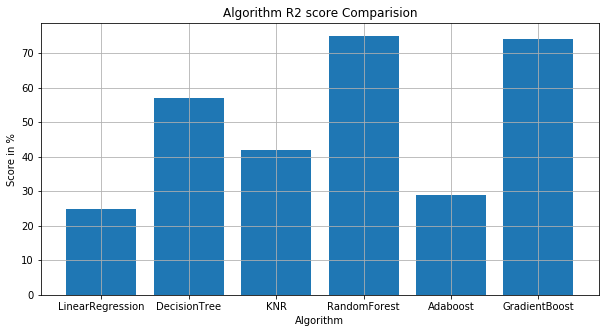

In [64]:
plt.figure(figsize=(10,5))
plt.bar(algoName, r2Score)
plt.grid()
plt.title('Algorithm R2 score Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()

As we can see Random foreset has performed well

### USING KNR REGRESSOR TO PREDICT FEES FOR TEST DATA

In [65]:
#RFR gave max score for random state =43
rfr = RFR(n_estimators=200)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=43)
rfr.fit(train_x,train_y)
pred_y = rfr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  75.0
MAE: 189.67196217559695
MSE: 100028.70650386738
RMSE: 316.2731517278496


In [66]:
test_data.isnull().sum()

CITY             0
COST          4231
LOCALITY         0
RATING           0
VOTES            0
TITLE_1          0
TITLE_2          0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
dtype: int64

In [67]:
#dropping cost column

test_data.drop(["COST"],axis=1,inplace=True)

In [68]:
#Lets predict data with test dataset

pred_test_data = rfr.predict(test_data)

In [69]:
#Adding Fees column in dataframe
cost_pred_test_data = pd.DataFrame(pred_test_data,columns=["COST"])

In [70]:
#Saving predicted data in csv file
cost_pred_test_data.to_csv("Project_19_Restaurant_Food_Cost.csv",index=False)

### SAVING MODEL

In [71]:
joblib.dump(rfr, 'Project_19_Restaurant_Food_Cost.pkl')

['Project_19_Restaurant_Food_Cost.pkl']

### CONCLUSION

In this project, two dataset were give for training and testing. After importing dataset I've merged it with a flag 0 for training and 1 for testing. After checking unique values checked for null values and found null values in few features, missing values been replaced with Not Available and 0 for VOTES and Rating.

To make data more accurate for prediction, I've seperated TITLE and CUISINES in to multiple coulumns, also fixed datatype of VOTES. And encoded categorical features and prepared data for testing.

Used multiple algorithms by combining into a list and found Random Forest has performed better than other models. Also Tried to apply PCA for training the model, but the score was very low.

Hence used Random FOrest to predict the test data and saved it into a CSV file.